# **Lista 5 - SVM e comitês de modelos**

## Aprendizagem de Máquina - 2022.1
## Matheus do Vale Almeida - 473219


---



In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

dataset = "californiabin"

# Dados para a Questão =========================================================
data = np.genfromtxt(f"{dataset}.csv", delimiter=',')
X = data[:,:-1]
y = data[:,-1].astype(int)

print(f"Número de amostras  - datasetQ1: {X.shape[0]}")
print(f"Número de dimensões - datasetQ1: {X.shape[1]}")
print(f"Número de classes   - datasetQ1: {np.unique(y).shape[0]}\n")

Número de amostras  - datasetQ1: 3000
Número de dimensões - datasetQ1: 8
Número de classes   - datasetQ1: 2



## Divisão treino - teste

In [23]:
np.random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



---



---



## Treinamento dos Modelos

In [24]:
hiperparametros = {
    'C': [pow(2,-5), pow(2,-3), pow(2,-1), pow(2,1), pow(2,3), pow(2,5), pow(2,7), pow(2,9), pow(2,11), pow(2,13), pow(2,15)],
    'gamma': [pow(2,-15), pow(2,-13), pow(2,-11), pow(2,-9), pow(2,-7), pow(2,-5), pow(2,-3), pow(2,-1), pow(2,1), pow(2,3)],
}

SVMgrid = GridSearchCV(SVC(kernel='rbf'), hiperparametros, cv=10)
SVMgrid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048,
                               8192, 32768],
                         'gamma': [3.0517578125e-05, 0.0001220703125,
                                   0.00048828125, 0.001953125, 0.0078125,
                                   0.03125, 0.125, 0.5, 2, 8]})

In [25]:
print("SVM - Hiperparâmetros selecionados: ")
SVMgrid.best_params_

SVM - Hiperparâmetros selecionados: 


{'C': 32768, 'gamma': 3.0517578125e-05}

In [26]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    'max_depth': [2, 4, 6, 8, 'None']
}

RFgrid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
RFgrid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 'None'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})

In [27]:
print("Random Forest - Hiperparâmetros selecionados: ")
RFgrid.best_params_

Random Forest - Hiperparâmetros selecionados: 


{'max_depth': 8, 'n_estimators': 160}

## Métricas de Classificação

In [28]:
SVM_pred = SVMgrid.predict(X_test)

print(f"Summary for the classifier SVM with accuracy {metrics.accuracy_score(y_test, SVM_pred):.3f}")
print(metrics.classification_report(y_test, SVM_pred))

Summary for the classifier SVM with accuracy 0.797
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       445
           1       0.79      0.81      0.80       455

    accuracy                           0.80       900
   macro avg       0.80      0.80      0.80       900
weighted avg       0.80      0.80      0.80       900



In [29]:
RF_pred = RFgrid.predict(X_test)

print(f"Summary for the classifier Random Forest with accuracy {metrics.accuracy_score(y_test, RF_pred):.3f}")
print(metrics.classification_report(y_test, RF_pred))

Summary for the classifier Random Forest with accuracy 0.848
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       445
           1       0.87      0.82      0.85       455

    accuracy                           0.85       900
   macro avg       0.85      0.85      0.85       900
weighted avg       0.85      0.85      0.85       900



## Curvas ROC e PR

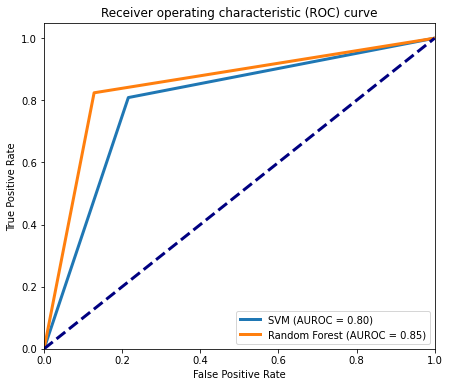

In [30]:
# Plota curva ROC    
plt.figure(figsize=(7,6))
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(y_test, SVM_pred)
plt.plot(fprSVM, tprSVM, lw=3, label=f"SVM (AUROC = {metrics.auc(fprSVM, tprSVM):0.2f})")

fprRF, tprRF, thresholdsRF = metrics.roc_curve(y_test, RF_pred)
plt.plot(fprRF, tprRF, lw=3, label=f"Random Forest (AUROC = {metrics.auc(fprRF, tprRF):0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

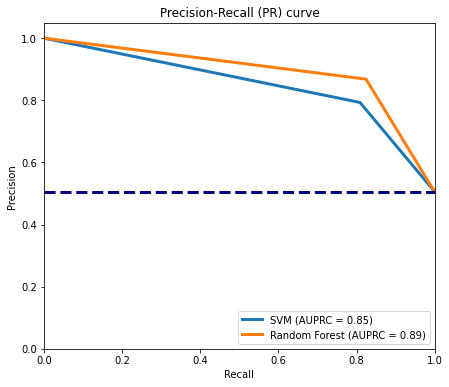

In [31]:
# Plota curva PR    
plt.figure(figsize=(7,6))
precisionSVM, recallSVM, thresholdsSVM = metrics.precision_recall_curve(y_test, SVM_pred)
plt.plot(recallSVM, precisionSVM, lw=3, label=f"SVM (AUPRC = {metrics.auc(recallSVM, precisionSVM):0.2f})")

precisionRF, recallRF, thresholdsRF = metrics.precision_recall_curve(y_test, RF_pred)
plt.plot(recallRF, precisionRF, lw=3, label=f"Random Forest (AUPRC = {metrics.auc(recallRF, precisionRF):0.2f})")

positive_ratio = np.mean(y_test == 1)
plt.plot([0, 1], [positive_ratio, positive_ratio], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) curve')
plt.legend(loc="lower right")
plt.show()